# KE5105 - Building Electrical Consumption Forecasting

# Modelling 1 - Preliminary model using SDE-3 data

## Load libraries

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

Using TensorFlow backend.


## Load data

In [2]:
sde3_1_df = pd.read_csv(os.path.join('source', 'sde3-data', 'no_nan', 'sde3_no_nan1.csv'), parse_dates=True)

In [3]:
sde3_1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380 entries, 0 to 1379
Data columns (total 28 columns):
Pt_timeStamp                        1380 non-null object
PWM.SDE3.IC1                        1380 non-null int64
PWM.SDE3.IC2                        1380 non-null float64
PWM.SDE3.MCC..AC.                   1380 non-null float64
PWM.CELC.IC1                        1380 non-null float64
PWM.CELC.IC2                        1380 non-null float64
PWM.SDE1                            1380 non-null float64
PWM.SDE2.SSB                        1380 non-null float64
PWM.SDE2.AC                         1380 non-null float64
PWM.SDE3.Ext                        1380 non-null float64
PWM.Street.Light                    1380 non-null float64
BTU.SDE3.Chiller.Plant              1380 non-null float64
BTU.SDE3.2                          1380 non-null float64
BTU.SDE3.1.2                        1380 non-null float64
PWM.SDE3.IC1_30min_avg              1380 non-null int64
PWM.SDE3.IC2_30min_avg      

In [4]:
sde3_1_df.iloc[:5, :5]

,Pt_timeStamp,PWM.SDE3.IC1,PWM.SDE3.IC2,PWM.SDE3.MCC..AC.,PWM.CELC.IC1
0,2016-06-01 00:30:00,9098611,8306487.5,5476307.0,1269571.50
1,2016-06-01 01:00:00,9098669,8306495.0,5476307.5,1269572.00
2,2016-06-01 01:30:00,9098729,8306501.0,5476308.0,1269572.63
3,2016-06-01 02:00:00,9098788,8306509.0,5476310.0,1269573.50
4,2016-06-01 02:30:00,9098845,8306517.0,5476311.0,1269574.00


In [5]:
sde3_1_df.iloc[:5, 5:11]

,PWM.CELC.IC2,PWM.SDE1,PWM.SDE2.SSB,PWM.SDE2.AC,PWM.SDE3.Ext,PWM.Street.Light
0,547602.31,899566.94,2505527.25,224610.72,868196.25,85832.10
1,547606.06,899573.25,2505536.25,224610.72,868200.31,85834.24
2,547610.00,899579.50,2505547.00,224610.72,868204.38,85836.35
3,547613.69,899585.94,2505557.25,224610.72,868208.50,85838.46
4,547617.50,899591.88,2505566.25,224610.72,868212.63,85840.59


In [6]:
sde3_1_df.iloc[:5, 11:15]

,BTU.SDE3.Chiller.Plant,BTU.SDE3.2,BTU.SDE3.1.2,PWM.SDE3.IC1_30min_avg
0,4150560.5,943278.94,1449962.88,60
1,4150560.5,943278.94,1449962.88,58
2,4150560.5,943278.94,1449962.88,60
3,4150560.5,943278.94,1449962.88,59
4,4150560.5,943278.94,1449962.88,57


In [7]:
sde3_1_df.iloc[:5, 15:18]

,PWM.SDE3.IC2_30min_avg,PWM.SDE3.MCC..AC._30min_avg,PWM.CELC.IC1_30min_avg
0,8.5,1.5,1.00
1,7.5,0.5,0.50
2,6.0,0.5,0.63
3,8.0,2.0,0.87
4,8.0,1.0,0.50


In [8]:
sde3_1_df.iloc[:5, 18:21]

In [9]:
sde3_1_df.iloc[:5, 21:24]

,PWM.SDE2.AC_30min_avg,PWM.SDE3.Ext_30min_avg,PWM.Street.Light_30min_avg
0,0,4.12,2.09
1,0,4.06,2.14
2,0,4.07,2.11
3,0,4.12,2.11
4,0,4.13,2.13


In [10]:
sde3_1_df.iloc[:5, 24:27]

,BTU.SDE3.Chiller.Plant_30min_avg,BTU.SDE3.2_30min_avg,BTU.SDE3.1.2_30min_avg
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,0.0,0.0


In [11]:
sde3_1_df.iloc[:5, 27:]

,PWM_30min_avg
0,39.10
1,39.24
2,37.75
3,37.52
4,38.49


In [12]:
sde3_1_df.loc[:, 'Pt_timeStamp'] = pd.to_datetime(sde3_1_df['Pt_timeStamp'])

In [13]:
sde3_1_df['Pt_timeStamp'][:5]

0   2016-06-01 00:30:00
1   2016-06-01 01:00:00
2   2016-06-01 01:30:00
3   2016-06-01 02:00:00
4   2016-06-01 02:30:00
Name: Pt_timeStamp, dtype: datetime64[ns]

In [14]:
sde3_1_df.set_index('Pt_timeStamp', drop=True, inplace=True)

In [15]:
sde3_1_df.iloc[:5, :4]

,PWM.SDE3.IC1,PWM.SDE3.IC2,PWM.SDE3.MCC..AC.,PWM.CELC.IC1
Pt_timeStamp,,,,
2016-06-01 00:30:00,9098611,8306487.5,5476307.0,1269571.50
2016-06-01 01:00:00,9098669,8306495.0,5476307.5,1269572.00
2016-06-01 01:30:00,9098729,8306501.0,5476308.0,1269572.63
2016-06-01 02:00:00,9098788,8306509.0,5476310.0,1269573.50
2016-06-01 02:30:00,9098845,8306517.0,5476311.0,1269574.00


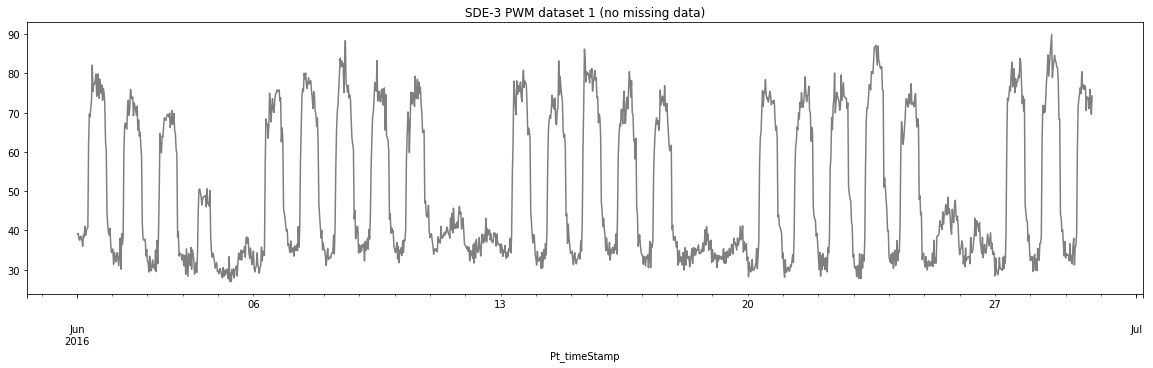

In [16]:
sde3_1_df.loc[:, 'PWM_30min_avg'].plot(figsize=(20, 5), title='SDE-3 PWM dataset 1 (no missing data)', color='black', alpha=0.5)

## Normalise the data for modelling

In [17]:
scaler = StandardScaler()
scaler.fit(sde3_1_df['PWM_30min_avg'].values.reshape(-1, 1))
sde3_1_df.loc[:, 'PWM_norm'] = scaler.transform(sde3_1_df['PWM_30min_avg'].values.reshape(-1, 1))
sde3_1_df.iloc[:5, -4:]

,BTU.SDE3.2_30min_avg,BTU.SDE3.1.2_30min_avg,PWM_30min_avg,PWM_norm
Pt_timeStamp,,,,
2016-06-01 00:30:00,0.0,0.0,39.10,-0.576075
2016-06-01 01:00:00,0.0,0.0,39.24,-0.568442
2016-06-01 01:30:00,0.0,0.0,37.75,-0.649682
2016-06-01 02:00:00,0.0,0.0,37.52,-0.662222
2016-06-01 02:30:00,0.0,0.0,38.49,-0.609334


## Split the data into train, validation and test set

In [18]:
# Generator which yields a batch of data each time it is called.
def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6, verbose=0):
    
    # Set the data max index limit
    if max_index is None:
        max_index = len(data) - delay - 1
    else:
        max_index = max_index - delay
    # Set the current data start index limit
    i = min_index + lookback
    if verbose:
        print('\nstarting generator ... batch start index i = %d\n' % i)
    
    while 1:
        if verbose:
            print('\n batch start index i = %d' % i)
        if shuffle:
            # Randomly select a batch from data 
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            # Select a batch starting from i
            # if i + batch_size >= max_index:
            #     print('\nrestarting generator ... i = %d\n' % i)
            #     i = min_index + lookback
                # print('reset i ... i = %d' % i)
            rows = np.arange(i, min(i + batch_size, max_index + 1))
            if i + batch_size >= max_index:
                i = min_index + lookback
            else:
                i += len(rows)
        
        # Each row in samples is a training sample from t-lookback to t-1.
        samples = np.zeros((len(rows),
                            lookback // step,
                            data.shape[-1]))
        # Each value in targets is a training label at t+delay.
        targets = np.zeros((len(rows),))
        
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][0]
        
        yield samples, targets

In [19]:
# Min,max indices for the datasets
train_max_idx = int(len(sde3_1_df) / 4 * 2)
val_max_idx = int(len(sde3_1_df) / 4 * 3)
print('train indices = [%d, %d], len = %d' % (0, train_max_idx-1, train_max_idx))
print('validation indices = [%d, %d, len = %d]' % (train_max_idx, val_max_idx-1, val_max_idx - train_max_idx))
print('test indices = [%d, %d], len = %d' % (val_max_idx, len(sde3_1_df)-1, len(sde3_1_df) - val_max_idx))

In [20]:
# Parameters for generating the datasets
lookback = 48  # 1 day; each day has 48 observations
step = 1  # sampling rate used for the lookback period
delay = 0  # 1 step ahead prediction
# batch_size = 128
batch_size = 32

In [21]:
# Generators for the train, validation and test sets.
train_gen = generator(sde3_1_df['PWM_norm'].values.reshape((-1, 1)),
                      lookback=lookback, delay=delay, min_index=0, max_index=train_max_idx-1,
                      batch_size=batch_size, step=step)
val_gen = generator(sde3_1_df['PWM_norm'].values.reshape((-1, 1)),
                    lookback=lookback, delay=delay, min_index=train_max_idx, max_index=val_max_idx-1,
                    batch_size=batch_size, step=step)
test_gen = generator(sde3_1_df['PWM_norm'].values.reshape((-1, 1)),
                     lookback=lookback, delay=delay, min_index=val_max_idx, max_index=None,
                     batch_size=batch_size, step=step)

In [22]:
# Number of batches in each dataset. This is needed for training, evaluating the RNN.
train_steps = ((train_max_idx - lookback + 1 - delay) // batch_size) + 1
val_steps = ((val_max_idx - train_max_idx - lookback + 1 - delay) // batch_size) + 1
test_steps = ((len(sde3_1_df) - val_max_idx - lookback + 1 - delay) // batch_size) + 1
print('train steps = %d\nvalidation steps = %d\ntest steps = %d' % (train_steps, val_steps, test_steps))

train steps = 21
validation steps = 10
test steps = 10


## Calculate the MAE for a Simple Last Observation Carry Forward (LOCF) Model

In [23]:
# Calculate a simple baseline for model accuracy using MAE. Baseline model predicts label at t as label at t-1
# (LOCF last observation carry forward)
batch_maes = []
locf_preds = []

for a_step in range(val_steps):
    samples, targets = next(val_gen)
    a_pred = samples[:, -1, 0]
    locf_preds.append(a_pred)
    mae = np.mean(np.abs(a_pred - targets))
    batch_maes.append(mae)
print('MAE = %f' % (np.mean(batch_maes)))

MAE = 0.163532


In [24]:
print('Actual MAE without normalization = %f' % (np.mean(batch_maes) * sde3_1_df['PWM_30min_avg'].values.std()))

In [25]:
locf_preds = scaler.inverse_transform(np.concatenate(locf_preds))
locf_preds[:10]

array([ 67.13,  66.49,  70.87,  70.56,  67.14,  73.  ,  75.49,  67.26,
        67.62,  72.56])

In [26]:
locf_preds.shape

(297,)

## Train a Baseline Recurrent Neural Network

In [27]:
model = Sequential()
model.add(layers.GRU(16, input_shape=(None, sde3_1_df['PWM_norm'].values.reshape((-1, 1)).shape[-1])))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae', metrics=['mape'])

In [28]:
history = model.fit_generator(train_gen, steps_per_epoch=train_steps, epochs=30,
                              validation_data=val_gen, validation_steps=val_steps, workers=0, use_multiprocessing=False)

Epoch 1/30


 1/21 [>.............................] - ETA: 33s - loss: 0.9416 - mean_absolute_percentage_error: 95.3604

 2/21 [=>............................] - ETA: 16s - loss: 0.8595 - mean_absolute_percentage_error: 111.1312

 4/21 [====>.........................] - ETA: 7s - loss: 0.7716 - mean_absolute_percentage_error: 110.9145 

 7/21 [=========>....................] - ETA: 3s - loss: 0.7882 - mean_absolute_percentage_error: 100.8406

10/21 [=============>................] - ETA: 2s - loss: 0.8073 - mean_absolute_percentage_error: 96.0275 

12/21 [================>.............] - ETA: 1s - loss: 0.7901 - mean_absolute_percentage_error: 93.3904

14/21 [===================>..........] - ETA: 1s - loss: 0.7699 - mean_absolute_percentage_error: 91.4108

16/21 [=====================>........] - ETA: 0s - loss: 0.7235 - mean_absolute_percentage_error: 87.9652

18/21 [========================>.....] - ETA: 0s - loss: 0.7168 - mean_absolute_percentage_error: 86.3516

20/21 [===========================>..] - ETA: 0s - loss: 0.7098 - mean_absolute_percentage_error: 84.8308

21/21 [==============================] - 2s 114ms/step - loss: 0.7517 - mean_absolute_percentage_error: 85.6471 - val_loss: 0.6189 - val_mean_absolute_percentage_error: 69.2392


Epoch 2/30


 1/21 [>.............................] - ETA: 0s - loss: 0.6894 - mean_absolute_percentage_error: 69.3711

 4/21 [====>.........................] - ETA: 0s - loss: 0.5605 - mean_absolute_percentage_error: 240.1136

 7/21 [=========>....................] - ETA: 0s - loss: 0.5584 - mean_absolute_percentage_error: 165.3108

10/21 [=============>................] - ETA: 0s - loss: 0.5835 - mean_absolute_percentage_error: 135.8336

13/21 [=================>............] - ETA: 0s - loss: 0.5720 - mean_absolute_percentage_error: 118.2339

16/21 [=====================>........] - ETA: 0s - loss: 0.5122 - mean_absolute_percentage_error: 104.0866

19/21 [==========================>...] - ETA: 0s - loss: 0.5073 - mean_absolute_percentage_error: 95.9567 

21/21 [==============================] - 0s 24ms/step - loss: 0.5546 - mean_absolute_percentage_error: 94.2844 - val_loss: 0.4045 - val_mean_absolute_percentage_error: 47.6813


Epoch 3/30
 1/21 [>.............................] - ETA: 0s - loss: 0.4873 - mean_absolute_percentage_error: 48.8440

 3/21 [===>..........................] - ETA: 0s - loss: 0.4398 - mean_absolute_percentage_error: 293.2909

 6/21 [=======>......................] - ETA: 0s - loss: 0.3354 - mean_absolute_percentage_error: 273.3210

 9/21 [===========>..................] - ETA: 0s - loss: 0.3681 - mean_absolute_percentage_error: 200.3181

12/21 [================>.............] - ETA: 0s - loss: 0.3754 - mean_absolute_percentage_error: 161.5717

14/21 [===================>..........] - ETA: 0s - loss: 0.3634 - mean_absolute_percentage_error: 145.1625

17/21 [=======================>......] - ETA: 0s - loss: 0.3163 - mean_absolute_percentage_error: 123.1558

20/21 [===========================>..] - ETA: 0s - loss: 0.3250 - mean_absolute_percentage_error: 111.4934

21/21 [==============================] - 1s 26ms/step - loss: 0.3890 - mean_absolute_percentage_error: 111.4778 - val_loss: 0.2631 - val_mean_absolute_percentage_error: 35.7653


Epoch 4/30
 1/21 [>.............................] - ETA: 0s - loss: 0.3468 - mean_absolute_percentage_error: 36.9903

 3/21 [===>..........................] - ETA: 0s - loss: 0.3134 - mean_absolute_percentage_error: 359.9332

 6/21 [=======>......................] - ETA: 0s - loss: 0.2237 - mean_absolute_percentage_error: 335.9988

 9/21 [===========>..................] - ETA: 0s - loss: 0.2584 - mean_absolute_percentage_error: 240.3623

12/21 [================>.............] - ETA: 0s - loss: 0.2748 - mean_absolute_percentage_error: 191.0542

14/21 [===================>..........] - ETA: 0s - loss: 0.2697 - mean_absolute_percentage_error: 170.4485

17/21 [=======================>......] - ETA: 0s - loss: 0.2391 - mean_absolute_percentage_error: 144.1457

20/21 [===========================>..] - ETA: 0s - loss: 0.2508 - mean_absolute_percentage_error: 128.9431

21/21 [==============================] - 1s 24ms/step - loss: 0.3142 - mean_absolute_percentage_error: 127.8907 - val_loss: 0.2225 - val_mean_absolute_percentage_error: 33.3259


Epoch 5/30


 1/21 [>.............................] - ETA: 0s - loss: 0.2730 - mean_absolute_percentage_error: 30.6303

 3/21 [===>..........................] - ETA: 0s - loss: 0.2639 - mean_absolute_percentage_error: 357.8036

 6/21 [=======>......................] - ETA: 0s - loss: 0.1959 - mean_absolute_percentage_error: 305.4600

 9/21 [===========>..................] - ETA: 0s - loss: 0.2228 - mean_absolute_percentage_error: 219.2890

11/21 [==============>...............] - ETA: 0s - loss: 0.2308 - mean_absolute_percentage_error: 186.6626

14/21 [===================>..........] - ETA: 0s - loss: 0.2356 - mean_absolute_percentage_error: 156.4115

17/21 [=======================>......] - ETA: 0s - loss: 0.2107 - mean_absolute_percentage_error: 132.4238

20/21 [===========================>..] - ETA: 0s - loss: 0.2216 - mean_absolute_percentage_error: 118.6774

21/21 [==============================] - 1s 25ms/step - loss: 0.2821 - mean_absolute_percentage_error: 117.8331 - val_loss: 0.2007 - val_mean_absolute_percentage_error: 31.6608


Epoch 6/30


 1/21 [>.............................] - ETA: 0s - loss: 0.2272 - mean_absolute_percentage_error: 26.4771

 3/21 [===>..........................] - ETA: 0s - loss: 0.2361 - mean_absolute_percentage_error: 350.2883

 6/21 [=======>......................] - ETA: 0s - loss: 0.1798 - mean_absolute_percentage_error: 270.5330

 9/21 [===========>..................] - ETA: 0s - loss: 0.2023 - mean_absolute_percentage_error: 195.2676

12/21 [================>.............] - ETA: 0s - loss: 0.2187 - mean_absolute_percentage_error: 156.3209

15/21 [====================>.........] - ETA: 0s - loss: 0.2078 - mean_absolute_percentage_error: 132.5452

18/21 [========================>.....] - ETA: 0s - loss: 0.2011 - mean_absolute_percentage_error: 114.7812

21/21 [==============================] - 0s 24ms/step - loss: 0.2618 - mean_absolute_percentage_error: 106.3434 - val_loss: 0.1859 - val_mean_absolute_percentage_error: 29.8869


Epoch 7/30
 1/21 [>.............................] - ETA: 0s - loss: 0.2028 - mean_absolute_percentage_error: 24.0694

 3/21 [===>..........................] - ETA: 0s - loss: 0.2152 - mean_absolute_percentage_error: 339.0392

 6/21 [=======>......................] - ETA: 0s - loss: 0.1682 - mean_absolute_percentage_error: 237.9622

 9/21 [===========>..................] - ETA: 0s - loss: 0.1881 - mean_absolute_percentage_error: 172.6416

12/21 [================>.............] - ETA: 0s - loss: 0.2030 - mean_absolute_percentage_error: 138.7113

15/21 [====================>.........] - ETA: 0s - loss: 0.1937 - mean_absolute_percentage_error: 118.0746

18/21 [========================>.....] - ETA: 0s - loss: 0.1878 - mean_absolute_percentage_error: 102.5447

21/21 [==============================] - 1s 24ms/step - loss: 0.2452 - mean_absolute_percentage_error: 95.4087 - val_loss: 0.1732 - val_mean_absolute_percentage_error: 28.0880


Epoch 8/30
 1/21 [>.............................] - ETA: 0s - loss: 0.1879 - mean_absolute_percentage_error: 22.5475

 4/21 [====>.........................] - ETA: 0s - loss: 0.1864 - mean_absolute_percentage_error: 295.5189

 7/21 [=========>....................] - ETA: 0s - loss: 0.1652 - mean_absolute_percentage_error: 180.6614

10/21 [=============>................] - ETA: 0s - loss: 0.1830 - mean_absolute_percentage_error: 138.3429

13/21 [=================>............] - ETA: 0s - loss: 0.1908 - mean_absolute_percentage_error: 114.1960



16/21 [=====================>........] - ETA: 0s - loss: 0.1763 - mean_absolute_percentage_error: 98.5001 

18/21 [========================>.....] - ETA: 0s - loss: 0.1769 - mean_absolute_percentage_error: 90.8010

20/21 [===========================>..] - ETA: 0s - loss: 0.1797 - mean_absolute_percentage_error: 84.9354

21/21 [==============================] - 1s 27ms/step - loss: 0.2311 - mean_absolute_percentage_error: 84.9435 - val_loss: 0.1631 - val_mean_absolute_percentage_error: 26.4707


Epoch 9/30
 1/21 [>.............................] - ETA: 0s - loss: 0.1795 - mean_absolute_percentage_error: 21.6794

 3/21 [===>..........................] - ETA: 0s - loss: 0.1848 - mean_absolute_percentage_error: 321.0252

 5/21 [======>.......................] - ETA: 0s - loss: 0.1656 - mean_absolute_percentage_error: 230.3431

 7/21 [=========>....................] - ETA: 0s - loss: 0.1593 - mean_absolute_percentage_error: 169.9086

 9/21 [===========>..................] - ETA: 0s - loss: 0.1680 - mean_absolute_percentage_error: 141.5521

11/21 [==============>...............] - ETA: 0s - loss: 0.1747 - mean_absolute_percentage_error: 121.7614

13/21 [=================>............] - ETA: 0s - loss: 0.1806 - mean_absolute_percentage_error: 107.4262

15/21 [====================>.........] - ETA: 0s - loss: 0.1728 - mean_absolute_percentage_error: 98.1467 

18/21 [========================>.....] - ETA: 0s - loss: 0.1685 - mean_absolute_percentage_error: 85.7210

20/21 [===========================>..] - ETA: 0s - loss: 0.1710 - mean_absolute_percentage_error: 80.1586

21/21 [==============================] - 1s 32ms/step - loss: 0.2196 - mean_absolute_percentage_error: 80.1862 - val_loss: 0.1593 - val_mean_absolute_percentage_error: 25.2607


Epoch 10/30
 1/21 [>.............................] - ETA: 0s - loss: 0.1826 - mean_absolute_percentage_error: 21.6563

 3/21 [===>..........................] - ETA: 0s - loss: 0.1800 - mean_absolute_percentage_error: 309.0024

 6/21 [=======>......................] - ETA: 0s - loss: 0.1499 - mean_absolute_percentage_error: 208.6232

 8/21 [==========>...................] - ETA: 0s - loss: 0.1578 - mean_absolute_percentage_error: 164.8100

11/21 [==============>...............] - ETA: 0s - loss: 0.1688 - mean_absolute_percentage_error: 129.1488

14/21 [===================>..........] - ETA: 0s - loss: 0.1718 - mean_absolute_percentage_error: 108.8447

17/21 [=======================>......] - ETA: 0s - loss: 0.1587 - mean_absolute_percentage_error: 93.1869 

20/21 [===========================>..] - ETA: 0s - loss: 0.1659 - mean_absolute_percentage_error: 83.8598

21/21 [==============================] - 1s 25ms/step - loss: 0.2115 - mean_absolute_percentage_error: 83.5072 - val_loss: 0.1574 - val_mean_absolute_percentage_error: 24.7875


Epoch 11/30


 1/21 [>.............................] - ETA: 0s - loss: 0.1803 - mean_absolute_percentage_error: 21.3683

 3/21 [===>..........................] - ETA: 0s - loss: 0.1774 - mean_absolute_percentage_error: 296.8876

 6/21 [=======>......................] - ETA: 0s - loss: 0.1510 - mean_absolute_percentage_error: 226.0081

 9/21 [===========>..................] - ETA: 0s - loss: 0.1626 - mean_absolute_percentage_error: 162.3441

12/21 [================>.............] - ETA: 0s - loss: 0.1708 - mean_absolute_percentage_error: 129.2335

15/21 [====================>.........] - ETA: 0s - loss: 0.1654 - mean_absolute_percentage_error: 109.8819

18/21 [========================>.....] - ETA: 0s - loss: 0.1616 - mean_absolute_percentage_error: 95.3631 

21/21 [==============================] - 1s 24ms/step - loss: 0.2077 - mean_absolute_percentage_error: 88.0232 - val_loss: 0.1557 - val_mean_absolute_percentage_error: 24.4573


Epoch 12/30
 1/21 [>.............................] - ETA: 0s - loss: 0.1796 - mean_absolute_percentage_error: 21.3156

 4/21 [====>.........................] - ETA: 0s - loss: 0.1753 - mean_absolute_percentage_error: 342.3562

 7/21 [=========>....................] - ETA: 0s - loss: 0.1583 - mean_absolute_percentage_error: 207.4347

10/21 [=============>................] - ETA: 0s - loss: 0.1647 - mean_absolute_percentage_error: 155.0965

13/21 [=================>............] - ETA: 0s - loss: 0.1705 - mean_absolute_percentage_error: 126.0943

15/21 [====================>.........] - ETA: 0s - loss: 0.1641 - mean_absolute_percentage_error: 114.1253

17/21 [=======================>......] - ETA: 0s - loss: 0.1563 - mean_absolute_percentage_error: 102.7644

19/21 [==========================>...] - ETA: 0s - loss: 0.1623 - mean_absolute_percentage_error: 95.0208 

21/21 [==============================] - 1s 27ms/step - loss: 0.2045 - mean_absolute_percentage_error: 90.8758 - val_loss: 0.1544 - val_mean_absolute_percentage_error: 24.2168


Epoch 13/30
 1/21 [>.............................] - ETA: 0s - loss: 0.1781 - mean_absolute_percentage_error: 21.1956

 3/21 [===>..........................] - ETA: 0s - loss: 0.1765 - mean_absolute_percentage_error: 288.4086

 6/21 [=======>......................] - ETA: 0s - loss: 0.1518 - mean_absolute_percentage_error: 248.7317

 9/21 [===========>..................] - ETA: 0s - loss: 0.1617 - mean_absolute_percentage_error: 177.0777

12/21 [================>.............] - ETA: 0s - loss: 0.1674 - mean_absolute_percentage_error: 139.8471

15/21 [====================>.........] - ETA: 0s - loss: 0.1629 - mean_absolute_percentage_error: 118.3034

18/21 [========================>.....] - ETA: 0s - loss: 0.1594 - mean_absolute_percentage_error: 102.3289

21/21 [==============================] - 1s 24ms/step - loss: 0.2018 - mean_absolute_percentage_error: 93.7210 - val_loss: 0.1541 - val_mean_absolute_percentage_error: 24.0377


Epoch 14/30


 1/21 [>.............................] - ETA: 0s - loss: 0.1785 - mean_absolute_percentage_error: 21.2385

 3/21 [===>..........................] - ETA: 0s - loss: 0.1765 - mean_absolute_percentage_error: 285.8291

 6/21 [=======>......................] - ETA: 0s - loss: 0.1519 - mean_absolute_percentage_error: 256.4374

 8/21 [==========>...................] - ETA: 0s - loss: 0.1583 - mean_absolute_percentage_error: 200.2611

10/21 [=============>................] - ETA: 0s - loss: 0.1630 - mean_absolute_percentage_error: 166.1236

12/21 [================>.............] - ETA: 0s - loss: 0.1662 - mean_absolute_percentage_error: 143.4321

15/21 [====================>.........] - ETA: 0s - loss: 0.1621 - mean_absolute_percentage_error: 121.1782

18/21 [========================>.....] - ETA: 0s - loss: 0.1586 - mean_absolute_percentage_error: 104.7258

20/21 [===========================>..] - ETA: 0s - loss: 0.1613 - mean_absolute_percentage_error: 97.0843 

21/21 [==============================] - 1s 29ms/step - loss: 0.1996 - mean_absolute_percentage_error: 95.6597 - val_loss: 0.1543 - val_mean_absolute_percentage_error: 23.9066


Epoch 15/30


 1/21 [>.............................] - ETA: 0s - loss: 0.1799 - mean_absolute_percentage_error: 21.3399

 3/21 [===>..........................] - ETA: 0s - loss: 0.1769 - mean_absolute_percentage_error: 282.0729

 5/21 [======>.......................] - ETA: 0s - loss: 0.1651 - mean_absolute_percentage_error: 311.8239

 7/21 [=========>....................] - ETA: 0s - loss: 0.1594 - mean_absolute_percentage_error: 228.1637

 9/21 [===========>..................] - ETA: 0s - loss: 0.1613 - mean_absolute_percentage_error: 185.4383

11/21 [==============>...............] - ETA: 0s - loss: 0.1630 - mean_absolute_percentage_error: 156.7347

13/21 [=================>............] - ETA: 0s - loss: 0.1676 - mean_absolute_percentage_error: 136.5761

15/21 [====================>.........] - ETA: 0s - loss: 0.1618 - mean_absolute_percentage_error: 123.1592

17/21 [=======================>......] - ETA: 0s - loss: 0.1544 - mean_absolute_percentage_error: 110.7513

19/21 [==========================>...] - ETA: 0s - loss: 0.1604 - mean_absolute_percentage_error: 102.1137

21/21 [==============================] - 1s 36ms/step - loss: 0.1978 - mean_absolute_percentage_error: 96.9576 - val_loss: 0.1550 - val_mean_absolute_percentage_error: 23.8822


Epoch 16/30


 1/21 [>.............................] - ETA: 0s - loss: 0.1804 - mean_absolute_percentage_error: 21.3622

 3/21 [===>..........................] - ETA: 0s - loss: 0.1773 - mean_absolute_percentage_error: 278.1674

 6/21 [=======>......................] - ETA: 0s - loss: 0.1528 - mean_absolute_percentage_error: 266.9784

 9/21 [===========>..................] - ETA: 0s - loss: 0.1616 - mean_absolute_percentage_error: 189.0662

12/21 [================>.............] - ETA: 0s - loss: 0.1658 - mean_absolute_percentage_error: 148.5449

14/21 [===================>..........] - ETA: 0s - loss: 0.1654 - mean_absolute_percentage_error: 132.2649

17/21 [=======================>......] - ETA: 0s - loss: 0.1544 - mean_absolute_percentage_error: 112.5779

20/21 [===========================>..] - ETA: 0s - loss: 0.1609 - mean_absolute_percentage_error: 100.0718

21/21 [==============================] - 1s 26ms/step - loss: 0.1969 - mean_absolute_percentage_error: 98.3644 - val_loss: 0.1540 - val_mean_absolute_percentage_error: 23.7379


Epoch 17/30


 1/21 [>.............................] - ETA: 0s - loss: 0.1807 - mean_absolute_percentage_error: 21.3911

 3/21 [===>..........................] - ETA: 0s - loss: 0.1774 - mean_absolute_percentage_error: 277.8343

 6/21 [=======>......................] - ETA: 0s - loss: 0.1526 - mean_absolute_percentage_error: 269.2058

 9/21 [===========>..................] - ETA: 0s - loss: 0.1612 - mean_absolute_percentage_error: 190.4696

12/21 [================>.............] - ETA: 0s - loss: 0.1654 - mean_absolute_percentage_error: 149.5757

15/21 [====================>.........] - ETA: 0s - loss: 0.1614 - mean_absolute_percentage_error: 126.0507

18/21 [========================>.....] - ETA: 0s - loss: 0.1580 - mean_absolute_percentage_error: 108.7671

20/21 [===========================>..] - ETA: 0s - loss: 0.1606 - mean_absolute_percentage_error: 100.6820

21/21 [==============================] - 1s 29ms/step - loss: 0.1957 - mean_absolute_percentage_error: 98.8874 - val_loss: 0.1537 - val_mean_absolute_percentage_error: 23.7032


Epoch 18/30


 1/21 [>.............................] - ETA: 1s - loss: 0.1795 - mean_absolute_percentage_error: 21.2917

 3/21 [===>..........................] - ETA: 0s - loss: 0.1772 - mean_absolute_percentage_error: 276.2173

 6/21 [=======>......................] - ETA: 0s - loss: 0.1527 - mean_absolute_percentage_error: 271.5238

 7/21 [=========>....................] - ETA: 0s - loss: 0.1599 - mean_absolute_percentage_error: 236.7610

 8/21 [==========>...................] - ETA: 0s - loss: 0.1590 - mean_absolute_percentage_error: 211.5761

 9/21 [===========>..................] - ETA: 0s - loss: 0.1611 - mean_absolute_percentage_error: 191.9979

10/21 [=============>................] - ETA: 0s - loss: 0.1624 - mean_absolute_percentage_error: 175.0046

11/21 [==============>...............] - ETA: 0s - loss: 0.1625 - mean_absolute_percentage_error: 162.0058

12/21 [================>.............] - ETA: 0s - loss: 0.1652 - mean_absolute_percentage_error: 150.6937

13/21 [=================>............] - ETA: 0s - loss: 0.1669 - mean_absolute_percentage_error: 140.9589

14/21 [===================>..........] - ETA: 0s - loss: 0.1648 - mean_absolute_percentage_error: 134.0548

15/21 [====================>.........] - ETA: 0s - loss: 0.1613 - mean_absolute_percentage_error: 126.8980

17/21 [=======================>......] - ETA: 0s - loss: 0.1540 - mean_absolute_percentage_error: 114.0611

18/21 [========================>.....] - ETA: 0s - loss: 0.1579 - mean_absolute_percentage_error: 109.4647

19/21 [==========================>...] - ETA: 0s - loss: 0.1599 - mean_absolute_percentage_error: 105.0557

21/21 [==============================] - 1s 63ms/step - loss: 0.1950 - mean_absolute_percentage_error: 99.4861 - val_loss: 0.1513 - val_mean_absolute_percentage_error: 23.6019


Epoch 19/30
 1/21 [>.............................] - ETA: 0s - loss: 0.1751 - mean_absolute_percentage_error: 21.0087

 2/21 [=>............................] - ETA: 1s - loss: 0.1784 - mean_absolute_percentage_error: 405.8479

 3/21 [===>..........................] - ETA: 0s - loss: 0.1762 - mean_absolute_percentage_error: 278.2944

 4/21 [====>.........................] - ETA: 0s - loss: 0.1749 - mean_absolute_percentage_error: 395.5374

 5/21 [======>.......................] - ETA: 0s - loss: 0.1643 - mean_absolute_percentage_error: 325.9732

 6/21 [=======>......................] - ETA: 0s - loss: 0.1516 - mean_absolute_percentage_error: 273.2995

 7/21 [=========>....................] - ETA: 0s - loss: 0.1589 - mean_absolute_percentage_error: 238.2690

 8/21 [==========>...................] - ETA: 0s - loss: 0.1582 - mean_absolute_percentage_error: 212.8851

 9/21 [===========>..................] - ETA: 0s - loss: 0.1601 - mean_absolute_percentage_error: 193.1244

10/21 [=============>................] - ETA: 0s - loss: 0.1615 - mean_absolute_percentage_error: 176.0091

11/21 [==============>...............] - ETA: 0s - loss: 0.1617 - mean_absolute_percentage_error: 162.9005

13/21 [=================>............] - ETA: 0s - loss: 0.1661 - mean_absolute_percentage_error: 141.6903

14/21 [===================>..........] - ETA: 0s - loss: 0.1641 - mean_absolute_percentage_error: 134.7191

16/21 [=====================>........] - ETA: 0s - loss: 0.1569 - mean_absolute_percentage_error: 120.4830

17/21 [=======================>......] - ETA: 0s - loss: 0.1535 - mean_absolute_percentage_error: 114.6129

18/21 [========================>.....] - ETA: 0s - loss: 0.1573 - mean_absolute_percentage_error: 109.9764

19/21 [==========================>...] - ETA: 0s - loss: 0.1593 - mean_absolute_percentage_error: 105.5280

20/21 [===========================>..] - ETA: 0s - loss: 0.1600 - mean_absolute_percentage_error: 101.7882

21/21 [==============================] - 1s 66ms/step - loss: 0.1938 - mean_absolute_percentage_error: 99.8581 - val_loss: 0.1514 - val_mean_absolute_percentage_error: 23.5244


Epoch 20/30


 1/21 [>.............................] - ETA: 1s - loss: 0.1763 - mean_absolute_percentage_error: 21.0646

 2/21 [=>............................] - ETA: 1s - loss: 0.1793 - mean_absolute_percentage_error: 404.1088

 3/21 [===>..........................] - ETA: 1s - loss: 0.1765 - mean_absolute_percentage_error: 277.0896

 4/21 [====>.........................] - ETA: 1s - loss: 0.1751 - mean_absolute_percentage_error: 395.5624

 5/21 [======>.......................] - ETA: 1s - loss: 0.1646 - mean_absolute_percentage_error: 326.0277

 6/21 [=======>......................] - ETA: 1s - loss: 0.1519 - mean_absolute_percentage_error: 273.3519

 7/21 [=========>....................] - ETA: 1s - loss: 0.1591 - mean_absolute_percentage_error: 238.3011

 8/21 [==========>...................] - ETA: 0s - loss: 0.1583 - mean_absolute_percentage_error: 212.9180

 9/21 [===========>..................] - ETA: 0s - loss: 0.1601 - mean_absolute_percentage_error: 193.1412

11/21 [==============>...............] - ETA: 0s - loss: 0.1617 - mean_absolute_percentage_error: 162.9161

13/21 [=================>............] - ETA: 0s - loss: 0.1660 - mean_absolute_percentage_error: 141.7000

14/21 [===================>..........] - ETA: 0s - loss: 0.1640 - mean_absolute_percentage_error: 134.7402

15/21 [====================>.........] - ETA: 0s - loss: 0.1604 - mean_absolute_percentage_error: 127.5353

16/21 [=====================>........] - ETA: 0s - loss: 0.1568 - mean_absolute_percentage_error: 120.5016

17/21 [=======================>......] - ETA: 0s - loss: 0.1534 - mean_absolute_percentage_error: 114.6253

18/21 [========================>.....] - ETA: 0s - loss: 0.1571 - mean_absolute_percentage_error: 109.9900

19/21 [==========================>...] - ETA: 0s - loss: 0.1592 - mean_absolute_percentage_error: 105.5421

20/21 [===========================>..] - ETA: 0s - loss: 0.1599 - mean_absolute_percentage_error: 101.8032

21/21 [==============================] - 2s 76ms/step - loss: 0.1931 - mean_absolute_percentage_error: 99.8356 - val_loss: 0.1507 - val_mean_absolute_percentage_error: 23.4533


Epoch 21/30


 1/21 [>.............................] - ETA: 1s - loss: 0.1757 - mean_absolute_percentage_error: 21.0205

 2/21 [=>............................] - ETA: 1s - loss: 0.1791 - mean_absolute_percentage_error: 403.8493

 3/21 [===>..........................] - ETA: 1s - loss: 0.1763 - mean_absolute_percentage_error: 276.9131

 4/21 [====>.........................] - ETA: 1s - loss: 0.1749 - mean_absolute_percentage_error: 396.7214

 5/21 [======>.......................] - ETA: 1s - loss: 0.1643 - mean_absolute_percentage_error: 327.0040

 6/21 [=======>......................] - ETA: 1s - loss: 0.1517 - mean_absolute_percentage_error: 274.1742

 7/21 [=========>....................] - ETA: 1s - loss: 0.1588 - mean_absolute_percentage_error: 238.9998

 8/21 [==========>...................] - ETA: 0s - loss: 0.1582 - mean_absolute_percentage_error: 213.5360

 9/21 [===========>..................] - ETA: 0s - loss: 0.1598 - mean_absolute_percentage_error: 193.6759

10/21 [=============>................] - ETA: 0s - loss: 0.1612 - mean_absolute_percentage_error: 176.5054

12/21 [================>.............] - ETA: 0s - loss: 0.1641 - mean_absolute_percentage_error: 151.9024

14/21 [===================>..........] - ETA: 0s - loss: 0.1638 - mean_absolute_percentage_error: 135.0703

15/21 [====================>.........] - ETA: 0s - loss: 0.1602 - mean_absolute_percentage_error: 127.8392

16/21 [=====================>........] - ETA: 0s - loss: 0.1566 - mean_absolute_percentage_error: 120.7934

18/21 [========================>.....] - ETA: 0s - loss: 0.1570 - mean_absolute_percentage_error: 110.2432

20/21 [===========================>..] - ETA: 0s - loss: 0.1597 - mean_absolute_percentage_error: 102.0148

21/21 [==============================] - 1s 65ms/step - loss: 0.1922 - mean_absolute_percentage_error: 99.9930 - val_loss: 0.1510 - val_mean_absolute_percentage_error: 23.4371


Epoch 22/30


 1/21 [>.............................] - ETA: 1s - loss: 0.1757 - mean_absolute_percentage_error: 20.9984

 2/21 [=>............................] - ETA: 1s - loss: 0.1794 - mean_absolute_percentage_error: 400.9431

 3/21 [===>..........................] - ETA: 1s - loss: 0.1763 - mean_absolute_percentage_error: 274.9487

 4/21 [====>.........................] - ETA: 1s - loss: 0.1751 - mean_absolute_percentage_error: 398.1289

 5/21 [======>.......................] - ETA: 1s - loss: 0.1647 - mean_absolute_percentage_error: 328.1666

 6/21 [=======>......................] - ETA: 1s - loss: 0.1521 - mean_absolute_percentage_error: 275.1461

 7/21 [=========>....................] - ETA: 0s - loss: 0.1590 - mean_absolute_percentage_error: 239.8197

 9/21 [===========>..................] - ETA: 0s - loss: 0.1598 - mean_absolute_percentage_error: 194.2813

10/21 [=============>................] - ETA: 0s - loss: 0.1612 - mean_absolute_percentage_error: 177.0421

11/21 [==============>...............] - ETA: 0s - loss: 0.1614 - mean_absolute_percentage_error: 163.8275

12/21 [================>.............] - ETA: 0s - loss: 0.1640 - mean_absolute_percentage_error: 152.3258

13/21 [=================>............] - ETA: 0s - loss: 0.1658 - mean_absolute_percentage_error: 142.4536

15/21 [====================>.........] - ETA: 0s - loss: 0.1602 - mean_absolute_percentage_error: 128.1703

16/21 [=====================>........] - ETA: 0s - loss: 0.1567 - mean_absolute_percentage_error: 121.1084

17/21 [=======================>......] - ETA: 0s - loss: 0.1533 - mean_absolute_percentage_error: 115.1961

18/21 [========================>.....] - ETA: 0s - loss: 0.1570 - mean_absolute_percentage_error: 110.5206

20/21 [===========================>..] - ETA: 0s - loss: 0.1597 - mean_absolute_percentage_error: 102.2684

21/21 [==============================] - 1s 60ms/step - loss: 0.1917 - mean_absolute_percentage_error: 100.1978 - val_loss: 0.1502 - val_mean_absolute_percentage_error: 23.3765


Epoch 23/30


 1/21 [>.............................] - ETA: 0s - loss: 0.1755 - mean_absolute_percentage_error: 21.0066

 2/21 [=>............................] - ETA: 0s - loss: 0.1792 - mean_absolute_percentage_error: 400.9277

 3/21 [===>..........................] - ETA: 0s - loss: 0.1757 - mean_absolute_percentage_error: 274.8650

 5/21 [======>.......................] - ETA: 0s - loss: 0.1638 - mean_absolute_percentage_error: 327.6395

 7/21 [=========>....................] - ETA: 0s - loss: 0.1584 - mean_absolute_percentage_error: 239.4492

 9/21 [===========>..................] - ETA: 0s - loss: 0.1593 - mean_absolute_percentage_error: 193.9937

11/21 [==============>...............] - ETA: 0s - loss: 0.1610 - mean_absolute_percentage_error: 163.6005

13/21 [=================>............] - ETA: 0s - loss: 0.1655 - mean_absolute_percentage_error: 142.2593

15/21 [====================>.........] - ETA: 0s - loss: 0.1598 - mean_absolute_percentage_error: 127.9798

17/21 [=======================>......] - ETA: 0s - loss: 0.1530 - mean_absolute_percentage_error: 115.0393

19/21 [==========================>...] - ETA: 0s - loss: 0.1587 - mean_absolute_percentage_error: 105.8869

21/21 [==============================] - 1s 40ms/step - loss: 0.1908 - mean_absolute_percentage_error: 100.0160 - val_loss: 0.1504 - val_mean_absolute_percentage_error: 23.3560


Epoch 24/30
 1/21 [>.............................] - ETA: 0s - loss: 0.1763 - mean_absolute_percentage_error: 21.0669

 2/21 [=>............................] - ETA: 0s - loss: 0.1798 - mean_absolute_percentage_error: 398.9630

 3/21 [===>..........................] - ETA: 0s - loss: 0.1758 - mean_absolute_percentage_error: 273.5103

 5/21 [======>.......................] - ETA: 0s - loss: 0.1641 - mean_absolute_percentage_error: 327.6764

 7/21 [=========>....................] - ETA: 0s - loss: 0.1586 - mean_absolute_percentage_error: 239.4661

 8/21 [==========>...................] - ETA: 0s - loss: 0.1580 - mean_absolute_percentage_error: 213.9413

10/21 [=============>................] - ETA: 0s - loss: 0.1607 - mean_absolute_percentage_error: 176.7618

12/21 [================>.............] - ETA: 0s - loss: 0.1635 - mean_absolute_percentage_error: 152.0641

13/21 [=================>............] - ETA: 0s - loss: 0.1654 - mean_absolute_percentage_error: 142.2157

14/21 [===================>..........] - ETA: 0s - loss: 0.1633 - mean_absolute_percentage_error: 135.1717

16/21 [=====================>........] - ETA: 0s - loss: 0.1563 - mean_absolute_percentage_error: 120.8970

18/21 [========================>.....] - ETA: 0s - loss: 0.1567 - mean_absolute_percentage_error: 110.3265

20/21 [===========================>..] - ETA: 0s - loss: 0.1593 - mean_absolute_percentage_error: 102.0849

21/21 [==============================] - 1s 44ms/step - loss: 0.1903 - mean_absolute_percentage_error: 99.9576 - val_loss: 0.1495 - val_mean_absolute_percentage_error: 23.2789


Epoch 25/30


 1/21 [>.............................] - ETA: 0s - loss: 0.1764 - mean_absolute_percentage_error: 21.0961

 3/21 [===>..........................] - ETA: 0s - loss: 0.1757 - mean_absolute_percentage_error: 274.5773

 5/21 [======>.......................] - ETA: 0s - loss: 0.1635 - mean_absolute_percentage_error: 327.6772

 7/21 [=========>....................] - ETA: 0s - loss: 0.1581 - mean_absolute_percentage_error: 239.4722

 9/21 [===========>..................] - ETA: 0s - loss: 0.1588 - mean_absolute_percentage_error: 193.9726

11/21 [==============>...............] - ETA: 0s - loss: 0.1606 - mean_absolute_percentage_error: 163.5725

13/21 [=================>............] - ETA: 0s - loss: 0.1651 - mean_absolute_percentage_error: 142.2207

15/21 [====================>.........] - ETA: 0s - loss: 0.1594 - mean_absolute_percentage_error: 127.9219

17/21 [=======================>......] - ETA: 0s - loss: 0.1528 - mean_absolute_percentage_error: 114.9995

19/21 [==========================>...] - ETA: 0s - loss: 0.1584 - mean_absolute_percentage_error: 105.8374

21/21 [==============================] - 1s 39ms/step - loss: 0.1895 - mean_absolute_percentage_error: 99.8969 - val_loss: 0.1499 - val_mean_absolute_percentage_error: 23.2834


Epoch 26/30
 1/21 [>.............................] - ETA: 1s - loss: 0.1771 - mean_absolute_percentage_error: 21.1499

 2/21 [=>............................] - ETA: 1s - loss: 0.1805 - mean_absolute_percentage_error: 397.8871

 4/21 [====>.........................] - ETA: 0s - loss: 0.1744 - mean_absolute_percentage_error: 397.4939

 6/21 [=======>......................] - ETA: 0s - loss: 0.1517 - mean_absolute_percentage_error: 274.9099

 8/21 [==========>...................] - ETA: 0s - loss: 0.1579 - mean_absolute_percentage_error: 214.0427

10/21 [=============>................] - ETA: 0s - loss: 0.1603 - mean_absolute_percentage_error: 176.8011

12/21 [================>.............] - ETA: 0s - loss: 0.1631 - mean_absolute_percentage_error: 152.0680

14/21 [===================>..........] - ETA: 0s - loss: 0.1630 - mean_absolute_percentage_error: 135.1545

15/21 [====================>.........] - ETA: 0s - loss: 0.1595 - mean_absolute_percentage_error: 127.9169

17/21 [=======================>......] - ETA: 0s - loss: 0.1529 - mean_absolute_percentage_error: 115.0000

18/21 [========================>.....] - ETA: 0s - loss: 0.1565 - mean_absolute_percentage_error: 110.3135

20/21 [===========================>..] - ETA: 0s - loss: 0.1590 - mean_absolute_percentage_error: 102.0380

21/21 [==============================] - 1s 43ms/step - loss: 0.1889 - mean_absolute_percentage_error: 99.8363 - val_loss: 0.1504 - val_mean_absolute_percentage_error: 23.2859


Epoch 27/30


 1/21 [>.............................] - ETA: 0s - loss: 0.1779 - mean_absolute_percentage_error: 21.2047

 3/21 [===>..........................] - ETA: 0s - loss: 0.1759 - mean_absolute_percentage_error: 271.0257

 5/21 [======>.......................] - ETA: 0s - loss: 0.1644 - mean_absolute_percentage_error: 327.9338

 7/21 [=========>....................] - ETA: 0s - loss: 0.1587 - mean_absolute_percentage_error: 239.6430

 8/21 [==========>...................] - ETA: 0s - loss: 0.1582 - mean_absolute_percentage_error: 214.0848

10/21 [=============>................] - ETA: 0s - loss: 0.1605 - mean_absolute_percentage_error: 176.8056

12/21 [================>.............] - ETA: 0s - loss: 0.1632 - mean_absolute_percentage_error: 152.0707

14/21 [===================>..........] - ETA: 0s - loss: 0.1631 - mean_absolute_percentage_error: 135.1559

16/21 [=====================>........] - ETA: 0s - loss: 0.1563 - mean_absolute_percentage_error: 120.9019

18/21 [========================>.....] - ETA: 0s - loss: 0.1567 - mean_absolute_percentage_error: 110.3174

20/21 [===========================>..] - ETA: 0s - loss: 0.1590 - mean_absolute_percentage_error: 102.0273

21/21 [==============================] - 1s 38ms/step - loss: 0.1885 - mean_absolute_percentage_error: 99.7998 - val_loss: 0.1502 - val_mean_absolute_percentage_error: 23.2213


Epoch 28/30
 1/21 [>.............................] - ETA: 0s - loss: 0.1791 - mean_absolute_percentage_error: 21.3004

 2/21 [=>............................] - ETA: 0s - loss: 0.1817 - mean_absolute_percentage_error: 396.7445

 4/21 [====>.........................] - ETA: 0s - loss: 0.1747 - mean_absolute_percentage_error: 397.9692

 6/21 [=======>......................] - ETA: 0s - loss: 0.1519 - mean_absolute_percentage_error: 275.2863

 8/21 [==========>...................] - ETA: 0s - loss: 0.1582 - mean_absolute_percentage_error: 214.3258

10/21 [=============>................] - ETA: 0s - loss: 0.1603 - mean_absolute_percentage_error: 176.9851

12/21 [================>.............] - ETA: 0s - loss: 0.1631 - mean_absolute_percentage_error: 152.2146

14/21 [===================>..........] - ETA: 0s - loss: 0.1630 - mean_absolute_percentage_error: 135.2738

16/21 [=====================>........] - ETA: 0s - loss: 0.1562 - mean_absolute_percentage_error: 121.0074

18/21 [========================>.....] - ETA: 0s - loss: 0.1566 - mean_absolute_percentage_error: 110.4080

20/21 [===========================>..] - ETA: 0s - loss: 0.1589 - mean_absolute_percentage_error: 102.0965

21/21 [==============================] - 1s 40ms/step - loss: 0.1878 - mean_absolute_percentage_error: 99.8301 - val_loss: 0.1504 - val_mean_absolute_percentage_error: 23.2154


Epoch 29/30


 1/21 [>.............................] - ETA: 0s - loss: 0.1797 - mean_absolute_percentage_error: 21.3544

 3/21 [===>..........................] - ETA: 0s - loss: 0.1763 - mean_absolute_percentage_error: 270.7635

 5/21 [======>.......................] - ETA: 0s - loss: 0.1644 - mean_absolute_percentage_error: 328.7734

 7/21 [=========>....................] - ETA: 0s - loss: 0.1589 - mean_absolute_percentage_error: 240.2648

 8/21 [==========>...................] - ETA: 0s - loss: 0.1584 - mean_absolute_percentage_error: 214.6256

10/21 [=============>................] - ETA: 0s - loss: 0.1604 - mean_absolute_percentage_error: 177.1997

11/21 [==============>...............] - ETA: 0s - loss: 0.1608 - mean_absolute_percentage_error: 163.9601

13/21 [=================>............] - ETA: 0s - loss: 0.1652 - mean_absolute_percentage_error: 142.5356

15/21 [====================>.........] - ETA: 0s - loss: 0.1595 - mean_absolute_percentage_error: 128.1859

16/21 [=====================>........] - ETA: 0s - loss: 0.1563 - mean_absolute_percentage_error: 121.1602

17/21 [=======================>......] - ETA: 0s - loss: 0.1531 - mean_absolute_percentage_error: 115.2575

18/21 [========================>.....] - ETA: 0s - loss: 0.1567 - mean_absolute_percentage_error: 110.5439

19/21 [==========================>...] - ETA: 0s - loss: 0.1585 - mean_absolute_percentage_error: 106.0365

21/21 [==============================] - 1s 47ms/step - loss: 0.1875 - mean_absolute_percentage_error: 99.9250 - val_loss: 0.1498 - val_mean_absolute_percentage_error: 23.2002


Epoch 30/30


 1/21 [>.............................] - ETA: 1s - loss: 0.1789 - mean_absolute_percentage_error: 21.3199

 2/21 [=>............................] - ETA: 1s - loss: 0.1819 - mean_absolute_percentage_error: 394.3972

 3/21 [===>..........................] - ETA: 1s - loss: 0.1759 - mean_absolute_percentage_error: 270.3054

 4/21 [====>.........................] - ETA: 1s - loss: 0.1746 - mean_absolute_percentage_error: 397.9503

 5/21 [======>.......................] - ETA: 1s - loss: 0.1641 - mean_absolute_percentage_error: 328.3331

 7/21 [=========>....................] - ETA: 0s - loss: 0.1587 - mean_absolute_percentage_error: 239.9559

 9/21 [===========>..................] - ETA: 0s - loss: 0.1588 - mean_absolute_percentage_error: 194.2188

10/21 [=============>................] - ETA: 0s - loss: 0.1603 - mean_absolute_percentage_error: 176.9690

12/21 [================>.............] - ETA: 0s - loss: 0.1630 - mean_absolute_percentage_error: 152.1972

14/21 [===================>..........] - ETA: 0s - loss: 0.1630 - mean_absolute_percentage_error: 135.2555

16/21 [=====================>........] - ETA: 0s - loss: 0.1562 - mean_absolute_percentage_error: 121.0032

18/21 [========================>.....] - ETA: 0s - loss: 0.1566 - mean_absolute_percentage_error: 110.4015

20/21 [===========================>..] - ETA: 0s - loss: 0.1589 - mean_absolute_percentage_error: 102.0950

21/21 [==============================] - 1s 50ms/step - loss: 0.1869 - mean_absolute_percentage_error: 99.7704 - val_loss: 0.1497 - val_mean_absolute_percentage_error: 23.1749


In [29]:
history.history

{'loss': [0.7126357317713562,
  0.50381340601733915,
  0.32932580297238356,
  0.25510138774586616,
  0.22574563449788315,
  0.20824639522398,
  0.19444241850546959,
  0.18323429648378556,
  0.17429381924626242,
  0.16904483665929776,
  0.16718047727305571,
  0.16591359447467363,
  0.16479607200325463,
  0.16392447421112535,
  0.16349847108775581,
  0.16334929273135937,
  0.16297722345572024,
  0.16308239575858427,
  0.1623538316595963,
  0.16218072101705913,
  0.16188948826626454,
  0.16191500183949217,
  0.16147807825391539,
  0.16146033686640848,
  0.16113934691449935,
  0.16104098662409083,
  0.16105223983247705,
  0.16088266350398553,
  0.16096688022494687,
  0.16081552862006926],
 'mean_absolute_percentage_error': [84.886540825864614,
  93.670173240970598,
  111.49234096729124,
  128.8712083097559,
  118.61970828998126,
  106.85265509584612,
  95.646990386867827,
  84.935973788347567,
  80.160497837720257,
  83.835678005515604,
  88.681991220634671,
  91.792740771332262,
  94.8715

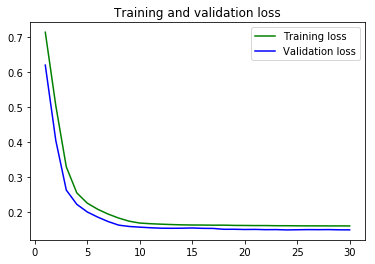

In [30]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.figure()
plt.plot(epochs, train_loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Plot the Training Set Results

In [31]:
train_preds = model.predict_generator(train_gen, steps=train_steps, workers=0)
train_preds = scaler.inverse_transform(train_preds)
train_preds[:10]

array([[ 34.40376663],
       [ 35.07610703],
       [ 32.76210403],
       [ 34.13088226],
       [ 34.39620972],
       [ 33.42186737],
       [ 34.01875687],
       [ 35.2025528 ],
       [ 34.38606262],
       [ 32.72994232]], dtype=float32)

In [32]:
train_preds.shape

(642, 1)

Text(0.5,1,'SDE-3 PWM dataset 1 training vs predicted')

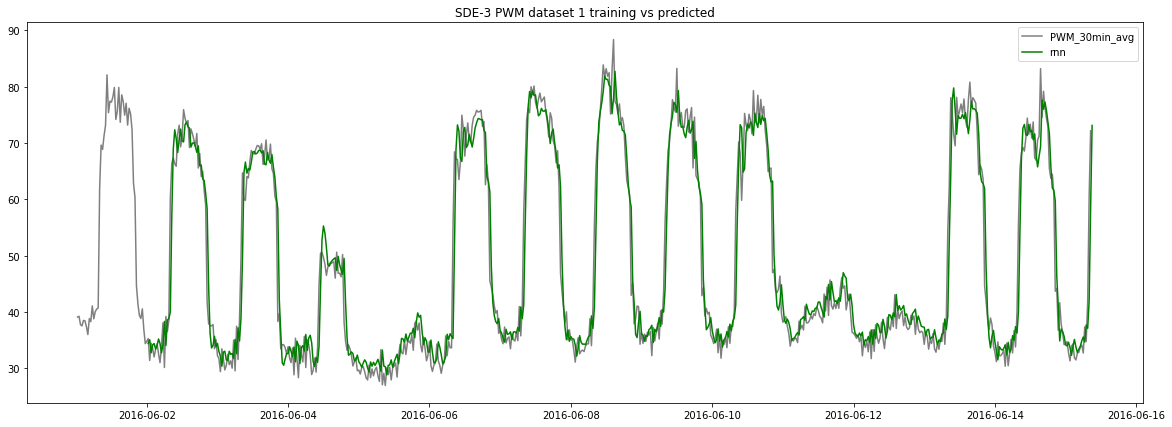

In [33]:
plt.figure(figsize=(20, 7))
plt.plot(sde3_1_df.iloc[:train_max_idx-1, sde3_1_df.columns.get_loc('PWM_30min_avg')], color='black', alpha=0.5)
plt.plot(sde3_1_df.index[lookback:lookback+len(train_preds)], train_preds, color='green', label='rnn')
plt.legend()
plt.title('SDE-3 PWM dataset 1 training vs predicted')

## Plot the Validation Set Results

In [34]:
val_preds = model.predict_generator(val_gen, steps=val_steps, workers=0)
val_preds = scaler.inverse_transform(val_preds)
val_preds[:10]

array([[ 71.21362305],
       [ 70.40733337],
       [ 71.68991852],
       [ 71.45146179],
       [ 68.4360733 ],
       [ 70.75000763],
       [ 73.56743622],
       [ 69.06856537],
       [ 66.81021881],
       [ 69.42533112]], dtype=float32)

In [35]:
val_preds.shape

(297, 1)

Text(0.5,1,'SDE-3 PWM dataset 1 validation vs predicted')

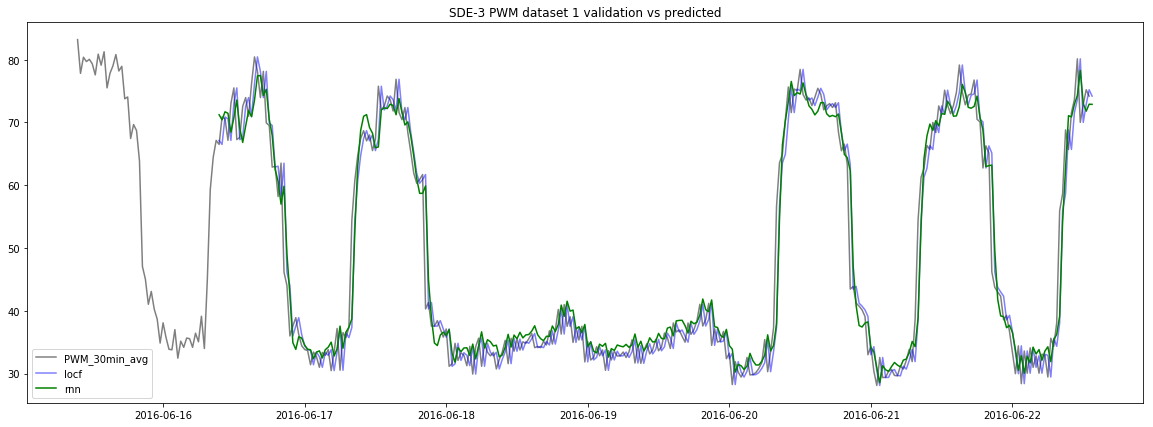

In [36]:
plt.figure(figsize=(20, 7))
plt.plot(sde3_1_df.iloc[train_max_idx:(val_max_idx-1), sde3_1_df.columns.get_loc('PWM_30min_avg')],
         color='black', alpha=0.5)
plt.plot(sde3_1_df.index[(train_max_idx+lookback):(train_max_idx+lookback+len(locf_preds))], locf_preds,
         color='blue', alpha=0.5, label='locf')
plt.plot(sde3_1_df.index[(train_max_idx+lookback):(train_max_idx+lookback+len(val_preds))], val_preds,
         color='green', label='rnn')
plt.legend()
plt.title('SDE-3 PWM dataset 1 validation vs predicted')

Text(0.5,1,'SDE-3 PWM dataset 1 validation vs predicted')

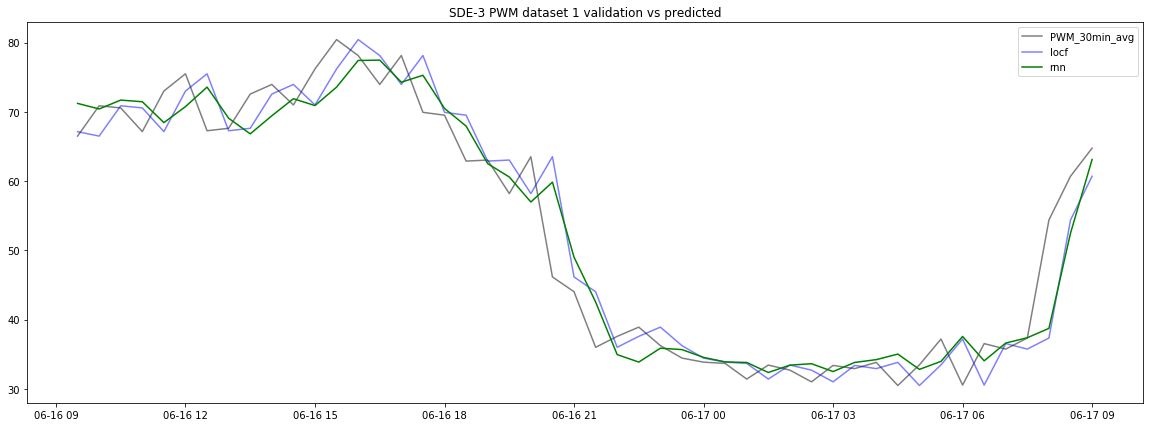

In [37]:
plt.figure(figsize=(20, 7))
plt.plot(sde3_1_df.iloc[train_max_idx+lookback:train_max_idx+lookback+48, sde3_1_df.columns.get_loc('PWM_30min_avg')],
         color='black', alpha=0.5)
plt.plot(sde3_1_df.index[train_max_idx+lookback:train_max_idx+lookback+48], locf_preds[:48],
         color='blue', alpha=0.5, label='locf')
plt.plot(sde3_1_df.index[train_max_idx+lookback:train_max_idx+lookback+48], val_preds[:48],
         color='green', label='rnn')
plt.legend()
plt.title('SDE-3 PWM dataset 1 validation vs predicted')

In [38]:
eval = model.evaluate_generator(val_gen, steps=val_steps, workers=0)
eval

[0.14966132890696476, 23.174941602379384]

In [39]:
history.history['loss'][-1]

0.16081552862006926

## Plot the Validation Curve

In [40]:
# Train and evaluate models with different number of hidden nodes.
val_curve_res = []
for i in [4, 8, 16, 32, 64, 128]:
    # Model specifications
    model = Sequential()
    model.add(layers.GRU(i, input_shape=(None, sde3_1_df['PWM_norm'].values.reshape((-1, 1)).shape[-1])))
    model.add(layers.Dense(1))
    model.compile(optimizer=RMSprop(), loss='mae', metrics=['mape'])
    # Fit model
    print('Fitting model with %d hidden nodes ...' % i)
    history = model.fit_generator(train_gen, steps_per_epoch=train_steps, epochs=30,
                                  validation_data=val_gen, validation_steps=val_steps,
                                  workers=0, use_multiprocessing=False, verbose=0)
    # Add eval results to list
    val_curve_res.append([i, history.history['loss'][-1], history.history['val_loss'][-1]])

Fitting model with 4 hidden nodes ...


Fitting model with 8 hidden nodes ...


Fitting model with 16 hidden nodes ...


Fitting model with 32 hidden nodes ...


Fitting model with 64 hidden nodes ...


Fitting model with 128 hidden nodes ...


In [41]:
val_curve_res

[[4, 0.2382250712296673, 0.2080161489721902],
 [8, 0.16068599751433851, 0.14760466396607935],
 [16, 0.15924869909464756, 0.1495031344168114],
 [32, 0.16000845424854124, 0.15635783152548152],
 [64, 0.16039431067270654, 0.17219237155384487],
 [128, 0.16218084431140223, 0.17644079240283581]]

Text(0.5,1,'Validation curve for base RNN model')

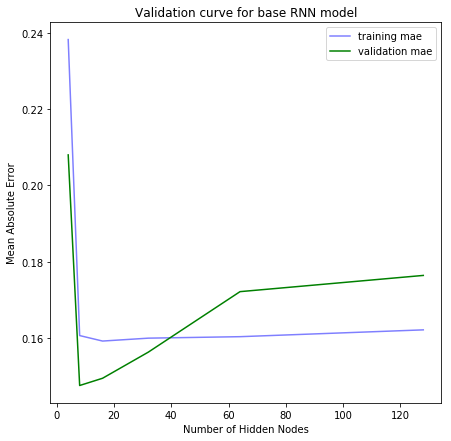

In [42]:
val_curve_res = np.array(val_curve_res)
plt.figure(figsize=(7, 7))
plt.plot(val_curve_res[:, 0], val_curve_res[:, 1], color='blue', alpha=0.5, label='training mae')
plt.plot(val_curve_res[:, 0], val_curve_res[:, 2], color='green', label='validation mae')
plt.xlabel('Number of Hidden Nodes')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Validation curve for base RNN model')

The validation MAE increases when the number of hidden nodes exceeds 8, showing signs of model overfitting.

## Plot the Learning Curve

In [60]:
# Train and evaluate a model with fitted with different number of samples in the training set.
learn_curve_res = []
splits = [0, 115, 230, 345, 460, 575]
splits.reverse()
for i in splits:  # i is the min index
    # Model specifications
    model = Sequential()
    model.add(layers.GRU(8, input_shape=(None, sde3_1_df['PWM_norm'].values.reshape((-1, 1)).shape[-1])))
    model.add(layers.Dense(1))
    model.compile(optimizer=RMSprop(), loss='mae', metrics=['mape'])
    # generator
    a_gen = generator(sde3_1_df['PWM_norm'].values.reshape((-1, 1)),
                      lookback=lookback, delay=delay, min_index=i, max_index=train_max_idx-1,
                      batch_size=batch_size, step=step)
    tr_steps = ((train_max_idx - i - lookback + 1 - delay) // batch_size) + 1
    # Fit model
    print('Fitting model with %d samples' % (train_max_idx - i))
    history = model.fit_generator(a_gen, steps_per_epoch=tr_steps, epochs=30,
                                  validation_data=val_gen, validation_steps=val_steps,
                                  workers=0, use_multiprocessing=False, verbose=0)
    # Add eval results to list
    learn_curve_res.append([train_max_idx - i, history.history['loss'][-1], history.history['val_loss'][-1]])

Fitting model with 115 samples


Fitting model with 230 samples


Fitting model with 345 samples


Fitting model with 460 samples


Fitting model with 575 samples


Fitting model with 690 samples


In [61]:
learn_curve_res

[[115, 0.9390541208324148, 0.91040688532370107],
 [230, 0.16604050093299741, 0.15239123242471356],
 [345, 0.20034260019308789, 0.18385629747251067],
 [460, 0.17135723311345555, 0.15163252906566518],
 [575, 0.15540629308635415, 0.14618305992397795],
 [690, 0.16323657273503478, 0.1486576780526325]]

Text(0.5,1,'Learning curve for base RNN model')

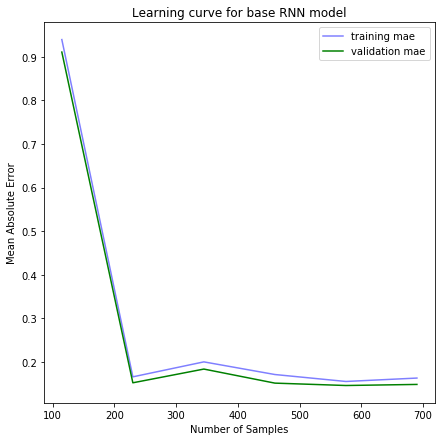

In [62]:
learn_curve_res = np.array(learn_curve_res)
plt.figure(figsize=(7, 7))
plt.plot(learn_curve_res[:, 0], learn_curve_res[:, 1], color='blue', alpha=0.5, label='training mae')
plt.plot(learn_curve_res[:, 0], learn_curve_res[:, 2], color='green', label='validation mae')
plt.xlabel('Number of Samples')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Learning curve for base RNN model')

The learning curves for training and validation losses have converged. More data will not be beneficial for lowering the model loss.

## Score the base RNN model on the test set

In [46]:
comb_gen = generator(sde3_1_df['PWM_norm'].values.reshape((-1, 1)),
                     lookback=lookback, delay=delay, min_index=0, max_index=val_max_idx - 1,
                     batch_size=batch_size, step=step)
comb_steps = ((val_max_idx - lookback + 1 - delay) // batch_size) + 1

In [47]:
model = Sequential()
model.add(layers.GRU(8, input_shape=(None, sde3_1_df['PWM_norm'].values.reshape((-1, 1)).shape[-1])))
model.add(layers.Dense(1))
model.compile(optimizer=RMSprop(), loss='mae', metrics=['mape'])

In [48]:
history = model.fit_generator(comb_gen, steps_per_epoch=comb_steps, epochs=30,
                              validation_data=None, validation_steps=None,
                              workers=0, use_multiprocessing=False, verbose=0)

In [49]:
test_score = model.evaluate_generator(test_gen, steps=test_steps, workers=0)
test_score

[0.16832795352847488, 33.97360929495558]